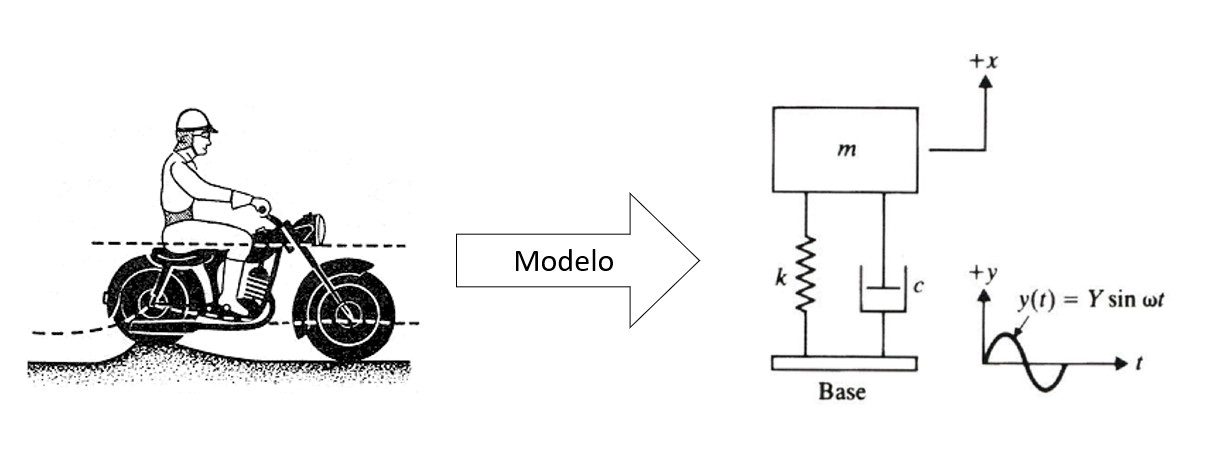

# Exercício 1

1. Obter as equações que representam a dinâmica do sistema motocicleta + piloto.
1. Calcular o período natural do sistema
1. Se a pista tiver um perfil tal que $z(x) = Z_A \cdot cos(\omega \cdot x)$, qual será o movimento de resposta do sistema?

Dados:
- $[𝐷_1,𝐷_2, 𝐷_3]$ = três números aleatórios
- $𝑀_𝑃=10⋅𝐷_1+50$ [kg]
- $𝑀_𝑀=15⋅𝐷_2+200$ [kg]
- $𝐾=10⋅𝐷_3+𝐷_2+20$ [N/mm]
- $𝐵=1,05⋅𝐵_{𝑐𝑟í𝑡𝑖𝑐𝑜}$ [Ns/m]
- $\omega = \pi$ [rad/s]
- $x(t) = t$ [m]

## Item 1

$y(t)$ : movimento vertical do motociclista


$x(t)$ : movimento horizontal do ciclista


$z(x)$ : perfil vertical da pista $z(x(t)) = Z_A \cdot cos(\omega \cdot t)$


$(M_M + M_P)\cdot \ddot y + B\cdot (\dot y - \dot z) + K \cdot (y - z) = 0$
com $z(t)$ definido por:

$z(t) = Z_A \cdot cos(\omega \cdot t)$

Logo, pela 2ª Lei de Newton, temos:

$(M_M + M_P)\cdot \ddot y + B\cdot (\dot y - \dot z) + K \cdot (y - z) = 0$

Como $\dot z = -\omega \cdot Z_A \cdot sin(\omega \cdot t)$, temos:

$(M_M + M_P)\cdot \ddot y + B \cdot (\dot y +\omega \cdot Z_A \cdot sin(\omega \cdot t)) + k \cdot (y - Z_A \cdot cos(\omega \cdot t)) = 0$

Reescrevendo:

$(M_M + M_P)\cdot \ddot y + B \cdot \dot y  + K \cdot y  = K \cdot Z_A \cdot cos(\omega \cdot t) - B \cdot \omega \cdot Z_A \cdot sin(\omega \cdot t)$

Equação Característica:

$(M_M + M_P)\cdot \ddot y + B \cdot \dot y  + K \cdot y  = 0$

In [1]:
import numpy as np

In [9]:
np.random.seed(100)
D1, D2, D3 = np.random.randint(0, 10, size=3)
Za = 0.1

print(f'D1 = {D1}; D2 = {D2}; D3 = {D3}')
mp = 10*D1 + 50
mm = 15*D2 + 200
K = (10*D3 + D2 + 20) * 1000

# print('Massa do piloto = ' + str(mp) + ' kg' )
print(f'Massa do piloto = {mp:.2f} kg' )
print(f'Massa do moto = {mm:.2f} kg' )
print(f'Constante Elástica = {K:.2f} kg/m' )

D1 = 8; D2 = 8; D3 = 3
Massa do piloto = 130.00 kg
Massa do moto = 320.00 kg
Constante Elástica = 58000.00 kg/m


## Item 2

$\omega_n$ : Frequência Natural em rad/s

$\omega_n = \sqrt{\dfrac{K}{M_M+M_P}}$

Período natural

$T_n = \dfrac{2\pi}{\omega_n}$

*Observação:* verifique o que acontece com a resposta do sistema quando a frequência de oscilação se aproxima da frequência natural do sistema

In [13]:
wn = np.sqrt(K/(mp+mm))
Tn = 2*np.pi / wn
w = wn # <--- verifique o impacto da variação da frequencia de oscilação na resposta do sistema

print(f'Periodo Natural: Tn = {Tn:.2f} s')
print(f'Frequencia Natural: wn = {wn:.2f} rad/s')
print(f'Frequencia: w = {w:.2f} rad/s')

Periodo Natural: Tn = 0.38 s
Frequencia Natural: wn = 16.39 rad/s
Frequencia: w = 16.39 rad/s


$B_{crítico} = 2 \cdot \omega_n \cdot m_{total}$

$B_{crítico} = 2 \cdot \sqrt{ K \cdot m_{total}}$

$B = \zeta \cdot B_{crítico}$

$\zeta$: coeficiente de amortecimento

*Observação:* verifique a resposta do sistema para os diversos níveis de amortecimento:

* $\zeta < 1$: Sub-crítico
* $\zeta = 1$: Crítico
* $\zeta > 1$: Super-crítico

In [14]:
B_crit = 2*wn*(mp+mm)
B = 0.5 * B_crit # <--- Verifique os níveis de amortecimento

print(f'Amortecimento Crítico: B_crit = {B_crit:.2f} Ns/m')
print(f'Amortecimeto: B = {B:.2f} Ns/m')

Amortecimento Crítico: B_crit = 11471.70 Ns/m
Amortecimeto: B = 5735.85 Ns/m


## Item 3

$ \ddot y  = \dfrac{1}{(M_M + M_P)} (- B \cdot \dot y  - K \cdot y + K \cdot Z_A \cdot cos(\omega \cdot t) - B \cdot \omega \cdot Z_A \cdot sin(\omega \cdot t))$

Adotando:

 $\dot y = v$     (Eq. 1)

  $\ddot y = \dot v$ 

  temos:

$\dot v = \dfrac{1}{(M_M + M_P)} (- B \cdot v  - K \cdot y + K \cdot Z_A \cdot cos(\omega \cdot t) - B \cdot \omega \cdot Z_A \cdot sin(\omega \cdot t)) $ (Eq. 2)

Assumindo a variável $f$, tal que:

$\vec f(t) = \begin{bmatrix}y(t) \\ v(t)\end{bmatrix}$

Tem-se:

$\dot f = \begin{bmatrix}\dot y \\ \dot v\end{bmatrix} = \begin{bmatrix}v \\ \dfrac{1}{(M_M + M_P)} (- B \cdot v  - K \cdot y + K \cdot Z_A \cdot cos(\omega \cdot t) - B \cdot \omega \cdot Z_A \cdot sin(\omega \cdot t))\end{bmatrix}$

$\dot y = v$

In [15]:
def eq1(t, y, v):
  yp = v
  return yp

$\dot v = \dfrac{1}{(M_M + M_P)} (- B \cdot v  - K \cdot y + K \cdot Z_A \cdot cos(\omega \cdot t) - B \cdot \omega \cdot Z_A \cdot sin(\omega \cdot t))$

In [16]:
def eq2(t, y, v):
  vp = (-B*v - K*y + K*Za*np.cos(w*t) - B*w*Za*np.sin(w*t))/(mm + mp)
  # vp = (-B*v - K*y)/(mm + mp) # Equação Característica
  return vp

$f(t) = \begin{bmatrix}y(t) \\ v(t)\end{bmatrix}$

In [17]:
def eq_vetorial(t, f):
  dydt = eq1(t, f[0], f[1])
  dvdt = eq2(t, f[0], f[1])

  dfdt = [dydt, dvdt]

  return dfdt

* Condições Iniciais



In [18]:
y0 = Za
v0 = 0

f0 = np.array([y0, v0])
t_inicial = 0 #s
t_final = 10  #s
N_pts = 5000
t = np.linspace(t_inicial, t_final, N_pts)

#print(t)

* Integrador ou *Solver*

In [19]:
from scipy.integrate import solve_ivp

f_res = solve_ivp(eq_vetorial, (t_inicial, t_final), f0, t_eval=t, max_step=5e-3)

* Gráfico dos resultados

Text(0, 0.5, 'y (t)')

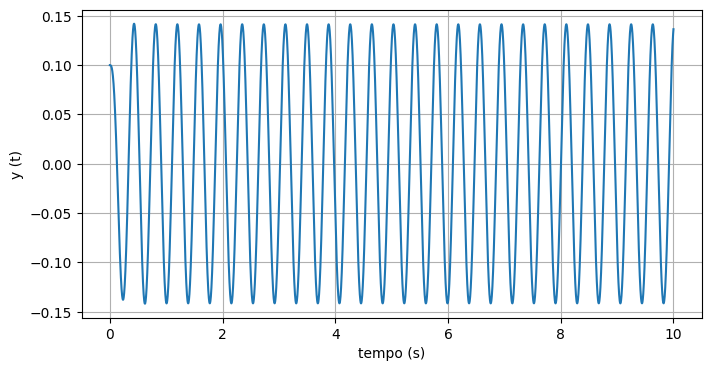

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4), dpi= 100, facecolor='w', edgecolor='k')
plt.plot(t, f_res.y[0,:])
plt.grid()
plt.xlabel('tempo (s)')
plt.ylabel('y (t)')
